In [59]:
import numpy as np
from qutip import *
from qutip.qip.operations import rx
import scipy as sp
from scipy.optimize import curve_fit,fsolve
from scipy.special import erfc,erf
import os
import sys
import time
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.constants as sc

In [60]:
from pyfonts import load_font
mpl.rcParams['mathtext.fontset']='cm'
font = load_font(
   font_url="https://github.com/openmaptiles/fonts/blob/master/roboto/Roboto-Regular.ttf?raw=true"
)

#plt.rcParams['font.family'] = 'Roboto Regular'

(-10.0, 10.0, -10.0, 20.0)

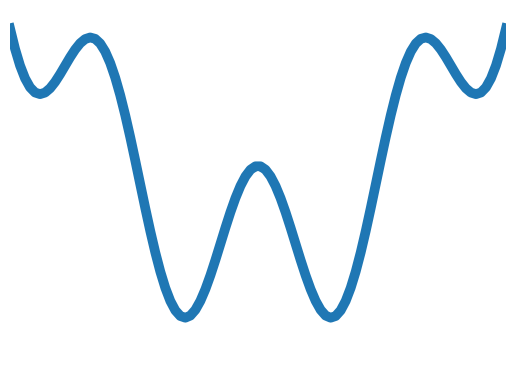

In [61]:
tpi=1
N=122
EJ1=7.3*tpi# Phase-Slip junction energy. Modified from 7.3
EJJ=60*tpi#JJA junction energy
x=np.linspace(-10,10,100)
import math as ma
def y(x,a,b):
    return (a*np.cos(x)+(b/2)*x**2)
def y1(x,a,b):#upto 20 terms we can determine the behaviour of the well here!
    N=21
    c=(b/2)*x**2
    for i in range(0,N,2):
        c=c+(-1)**(i/2)*a/ma.factorial(i)*(x**i)
    return c

def y2(x,a,b,a1,b1):
    N=3
    c=0
    if np.abs(x)<np.abs(np.abs(x)-3):
        c=(b1/2)*x**2
        for i in range(0,N,2):
            c=c+(-1)**(i/2)*a1/ma.factorial(i)*(x**i)
    else:    
        for i in range(0,N,2):
            if np.abs(x-b)<np.abs(x+b):
                c=c+(-1)**(i/2)*a/ma.factorial(i)*((x-b)**i)
            else:
                c=c+(-1)**(i/2)*a/ma.factorial(i)*((x+b)**i)
    return c
y=[y(i,EJ1,EJJ/N) for i in x]#fluxonium at half flux because cosine has the same sign as x^2!
plt.plot(x,y,linewidth=7.0)
plt.ylim(-10,20)
plt.xlim(-10,10)

plt.axis("off")
#plt.savefig("flux_potential.pdf",dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: 'energy.npy'

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


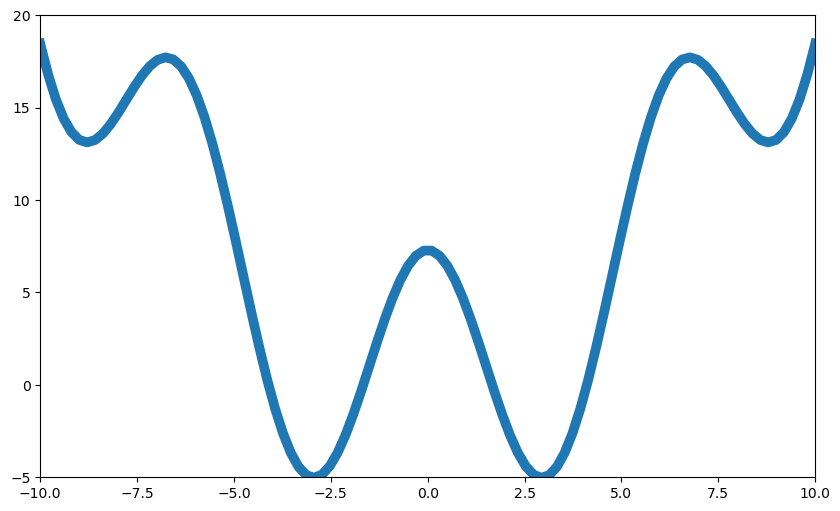

In [62]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
#plt.rc('font', family='Roboto Regular')
EJ1=7.3*tpi# Phase-Slip junction energy. Modified from 7.3
EJJ=60*tpi#JJA junction energy
x=np.linspace(-10,10,100)
import math as ma
def y(x,a,b):
    return (a*np.cos(x)+(b/2)*x**2)
def y1(x,a,b):#upto 20 terms we can determine the behaviour of the well here!
    N=21
    c=(b/2)*x**2
    for i in range(0,N,2):
        c=c+(-1)**(i/2)*a/ma.factorial(i)*(x**i)
    return c

def y2(x,a,b,a1,b1):
    N=3
    c=0
    if np.abs(x)<np.abs(np.abs(x)-3):
        c=(b1/2)*x**2
        for i in range(0,N,2):
            c=c+(-1)**(i/2)*a1/ma.factorial(i)*(x**i)
    else:    
        for i in range(0,N,2):
            if np.abs(x-b)<np.abs(x+b):
                c=c+(-1)**(i/2)*a/ma.factorial(i)*((x-b)**i)
            else:
                c=c+(-1)**(i/2)*a/ma.factorial(i)*((x+b)**i)
    return c
y=[y(i,EJ1,EJJ/N) for i in x]#fluxonium at half flux because cosine has the same sign as x^2!
y1=[y1(i,EJ1,EJJ/N) for i in x]#fluxonium at half flux because cosine has the same sign as x^2!
y2=[y2(i,min(y),x[np.argmin(y)],EJ1,EJJ/N) for i in x]#fluxonium at half flux because cosine has the same sign as x^2!
ax.plot(x,y,linewidth=7.0)
ax.set_ylim(-5,20)
ax.set_xlim(-10,10)
flux_e1=np.load("energy.npy")
for i in range(10):
    plt.plot(x,[flux_e1[i]-flux_e1[0]]*100)
#ax.set_title(r"$\omega_{01}/2\pi=30 \ \mathrm{MHz}$"+"\n"+r" $\omega_{12}/2\pi=6.03 \ \mathrm{GHz}$",font=font,fontsize=30)
ax.set_ylabel("Energy Levels"+"\n"+"$\mathrm{[GHz]}$",font=font,fontsize=30)
ax.set_xlabel('Fluxonium Phase $\phi$',font=font,fontsize=30)
ax.set_yticks([0,10,20],[r"$0$",r"$10$",r"$20$"],fontsize=40)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([-10,-5,0,5,10],[r"$-10.0$",r"$-5.0$",r"$0.0$",r"$5.0$",r"$10.0$"],fontsize=40)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
fig.tight_layout(pad=5) 
#plt.savefig('Energy_Levels.pdf',dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: 'energy_Will.npy'

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


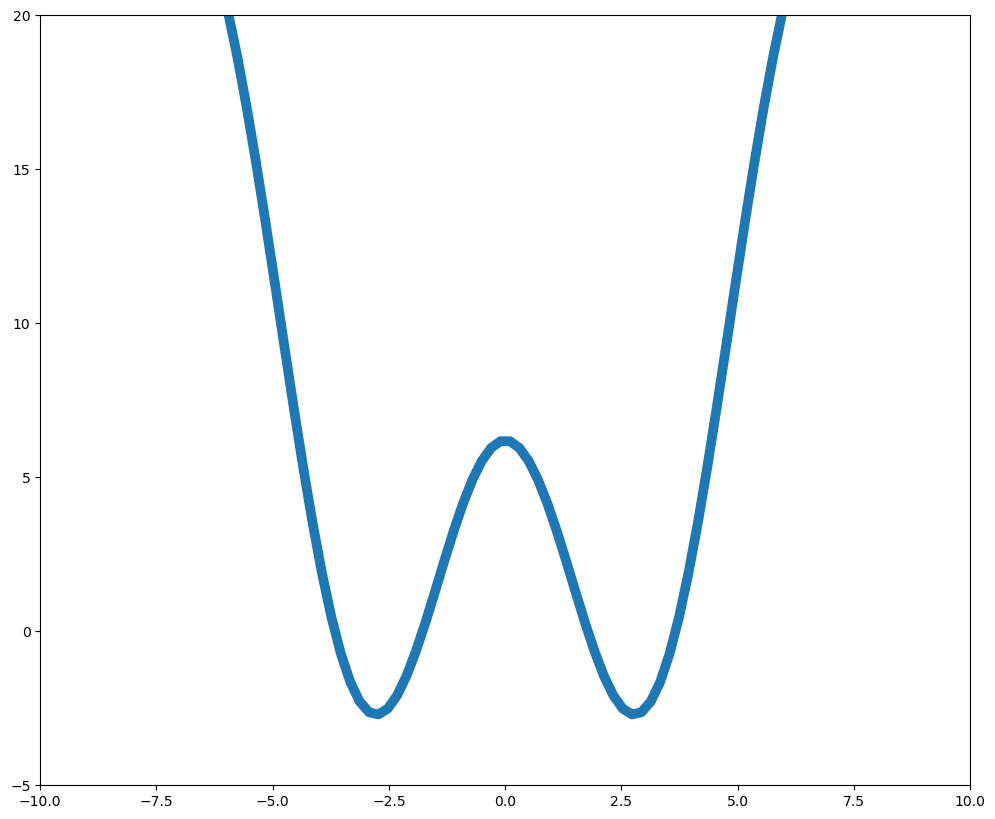

In [63]:
N=102
EJ1=6.2*tpi# Phase-Slip junction energy. Modified from 7.3
EJJ=81.6*tpi#JJA junction energy
fig,ax=plt.subplots(1,1,figsize=(12,10))
#plt.rc('font', family='Roboto Regular')
x=np.linspace(-10,10,100)
import math as ma
def y(x,a,b):
    return (a*np.cos(x)+(b/2)*x**2)
def y1(x,a,b):#upto 20 terms we can determine the behaviour of the well here!
    N=21
    c=(b/2)*x**2
    for i in range(0,N,2):
        c=c+(-1)**(i/2)*a/ma.factorial(i)*(x**i)
    return c

def y2(x,a,b,a1,b1):
    N=3
    c=0
    if np.abs(x)<np.abs(np.abs(x)-3):
        c=(b1/2)*x**2
        for i in range(0,N,2):
            c=c+(-1)**(i/2)*a1/ma.factorial(i)*(x**i)
    else:    
        for i in range(0,N,2):
            if np.abs(x-b)<np.abs(x+b):
                c=c+(-1)**(i/2)*a/ma.factorial(i)*((x-b)**i)
            else:
                c=c+(-1)**(i/2)*a/ma.factorial(i)*((x+b)**i)
    return c
y=[y(i,EJ1,EJJ/N) for i in x]#fluxonium at half flux because cosine has the same sign as x^2!
y1=[y1(i,EJ1,EJJ/N) for i in x]#fluxonium at half flux because cosine has the same sign as x^2!
y2=[y2(i,min(y),x[np.argmin(y)],EJ1,EJJ/N) for i in x]#fluxonium at half flux because cosine has the same sign as x^2!
ax.plot(x,y,linewidth=7.0)
ax.set_ylim(-5,20)
ax.set_xlim(-10,10)
flux_e1=np.load("energy_Will.npy")
for i in range(10):
    plt.plot(x,[flux_e1[i]-flux_e1[0]]*100)
ax.set_ylabel("Energy Levels"+"\n"+"$\mathrm{[GHz]}$",fontsize=40)
ax.set_xlabel('Fluxonium Phase $\phi$',fontsize=40)
ax.set_yticks([0,10,20],[r"$0$",r"$10$",r"$20$"],fontsize=40)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([-10,-5,0,5,10],[r"$-10.0$",r"$-5.0$",r"$0.0$",r"$5.0$",r"$10.0$"],fontsize=40)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
fig.tight_layout(pad=5) 
#plt.savefig('Energy_Levels_Will.pdf',dpi=300)

In [64]:
omega1=np.load("freq_Zhang.npy")
fig,ax=plt.subplots(1,1,figsize=(11,5))
#plt.rc('font', family='Roboto Regular')
ax.plot(np.linspace(1,9,9),omega1[1:10],'o--',color='red',linewidth=3,ms=10)
ax.set_ylabel("Frequency"+"\n"+"$\mathrm{[GHz]}$",fontsize=40,font=font)
ax.set_xlabel(r'Parasitic Mode Index $\mu$',fontsize=35,font=font)

#plt.yscale('log')
ax.set_yticks([10,18],[r"$10$",r"$18$"],fontsize=50)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([2,4,6,8,10],[r"$2$",r"$4$",r"$6$",r"$8$",r"$10$"],fontsize=50)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
ax.set_ylim(6,20)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
plt.grid()
fig.tight_layout(pad=4) 
plt.savefig('freq.pdf',bbox_inches='tight',dpi=300,transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: 'freq_Zhang.npy'

In [65]:
omega1=np.load("freq_Will.npy")
fig,ax=plt.subplots(1,1,figsize=(10,4))
#plt.rc('font', family='Roboto Regular')
ax.plot(np.linspace(1,9,9),omega1[1:10],'o--',color="red",linewidth=3,ms=10)
ax.set_ylabel("Frequency"+"\n"+"$\mathrm{[GHz]}$",fontsize=35,font=font)
ax.set_xlabel(r'Parasitic Mode Index $\mu$',fontsize=35,font=font)

#plt.yscale('log')
ax.set_yticks([10,20],[r"$10$",r"$20$"],fontsize=40)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([2,4,6,8],[r"$2$",r"$4$",r"$6$",r"$8$"],fontsize=40)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
ax.set_ylim(8,23)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
plt.grid()
fig.tight_layout(pad=2) 
plt.savefig('freq_Will.pdf', bbox_inches='tight',dpi=300, transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: 'freq_Will.npy'

In [77]:
par_files=np.load('par_new.npz')['arr_0']
flux_files=np.load('flux_new.npz')['arr_0']
cross_files=np.load('cross_new.npz')['arr_0']

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


0.0001 1 12.70200544723777
0.0001 0.1 1.0285593918956395
0.0001 1 16.752884968450157
0.0001 0.1 1.0826005017640812
0.0001 1 15.667973977797917
0.0001 0.1 1.9664152207022763


findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


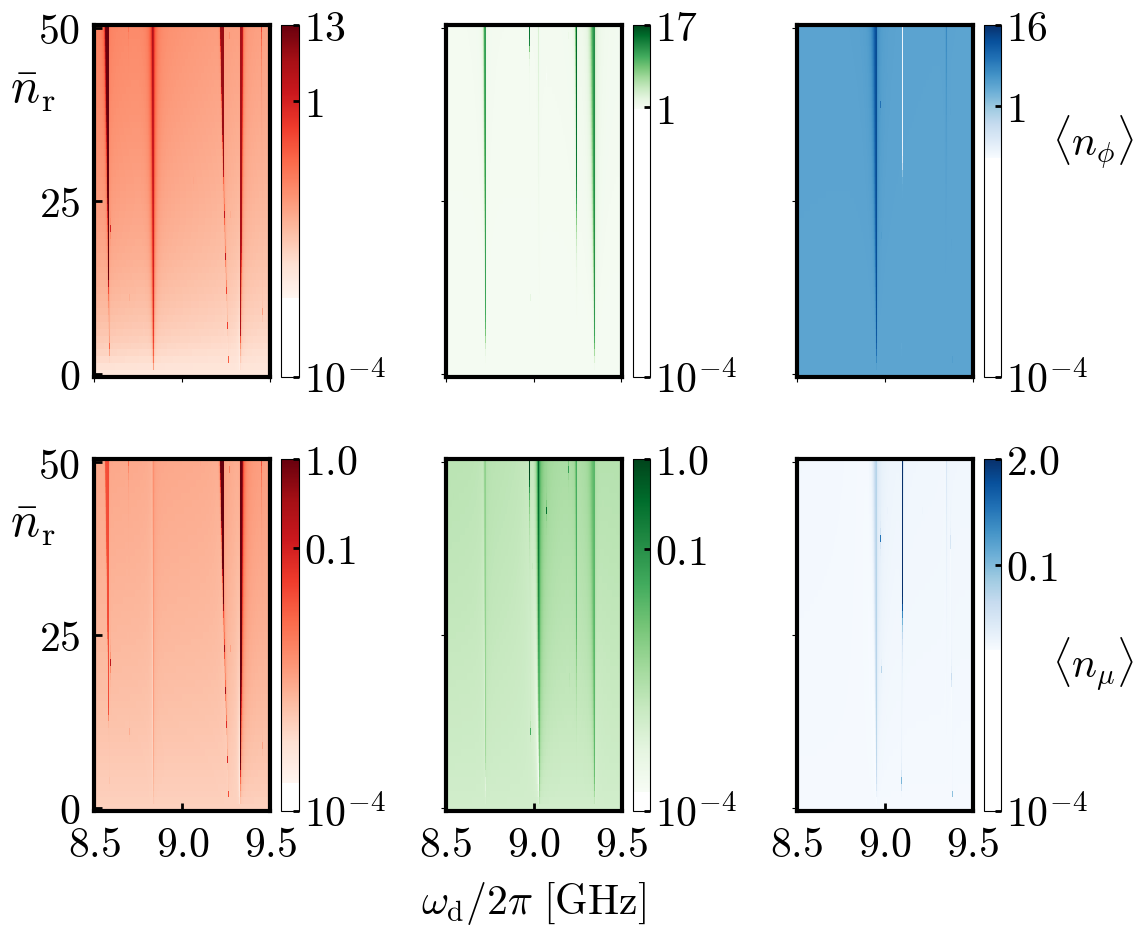

In [79]:
#Figure 3
mpl.rcParams['mathtext.fontset']='cm'
nr=np.linspace(0,50,51)# We will be able to see enough transitions within these many readout photons
omega_d=np.linspace(8.5,9.5,1000)
fig,ax=plt.subplots(2,3,figsize=(12,10), sharey=True, sharex=True)
#plt.rc('font', family='Roboto Regular')
c=['Reds','Greens','Blues','Purples']
import matplotlib.ticker as mticker
for i in range(3):#plot the first four states
    
    a=ax[0,i].pcolormesh(omega_d,nr,np.log(np.transpose(flux_files[i,:,:])),cmap=c[i])
    cbar = fig.colorbar(a,ax=ax[0,i])
    if i==2:
        cbar.ax.set_ylabel(r"$\langle n_\phi\rangle$",fontsize=30,rotation=360,y=0.75)
    cbar.ax.yaxis.set_major_formatter('{x:0<5.1f}')
    #cmin=np.min(np.transpose(flux_ex[:,i,:]))
    cmin=10**(-4)
    cmid=1
    cmax=np.max(np.transpose(flux_files[i,:,:]))
    #cmid=np.min(np.transpose(flux_files[:,i,:]))+1
    
    print(cmin,cmid,cmax)
    if i==0:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$13$"],fontsize=30)
    if i==1:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$17$"],fontsize=30)
    if i==2:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$16$"],fontsize=30)
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    for axis in ['top','bottom','left','right']:
        cbar.ax.spines[axis].set_linewidth(3)
        cbar.ax.spines[axis].set_linewidth(3)
    
    b=ax[1,i].pcolormesh(omega_d,nr,np.log(np.transpose(par_files[i,:,:])),cmap=c[i])
    cbar=plt.colorbar(b, ax=ax[1, i])
    if i==2:
        cbar.ax.set_ylabel(r"$\langle n_\mu\rangle$",fontsize=30,rotation=360)
    #cmin=np.min(np.transpose(par_ex[:,i,:]))
    cmin=10**(-4)
    cmax=np.max(np.transpose(par_files[i,:,:]))
    cmid=0.1
    print(cmin,cmid,cmax)
    if i==2:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$0.1$",r"$2.0$"],fontsize=30)
    else:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$0.1$",r"$1.0$"],fontsize=30)
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    for axis in ['top','bottom','left','right']:
        cbar.ax.spines[axis].set_linewidth(3)
        cbar.ax.spines[axis].set_linewidth(3)

for i in [0,1]:
    ax[i,0].set_yticks(np.linspace(0,50,3),[r"$0$",r"$25$",r"$50$"],fontsize=30)
    ax[i,0].set_ylabel(r"$\bar n_\mathrm{r}$",fontsize=35,rotation=360,y=0.75)
    ax[i,0].tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
for i in [0,1,2]:
    ax[1,i].set_xticks(np.linspace(8.5,9.5,3),[r"$8.5$",r"$9.0$",r"$9.5$"],fontsize=30)
    if i==1:
        ax[1,i].set_xlabel(r"$\omega_\mathrm{d}/2\pi \ \mathrm{[GHz]}$",fontsize=30,labelpad=10)
    ax[1,i].tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for i in [0,1]:
    for j in [0,1,2]:
        for axis in ['top','bottom','left','right'] :
            ax[i,j].spines[axis].set_linewidth(3)
            ax[i,j].spines[axis].set_linewidth(3)

fig.tight_layout(pad=3)    
plt.savefig("Paper_Figures/Floquet_log.pdf",bbox_inches='tight',dpi=300)

plt.show()

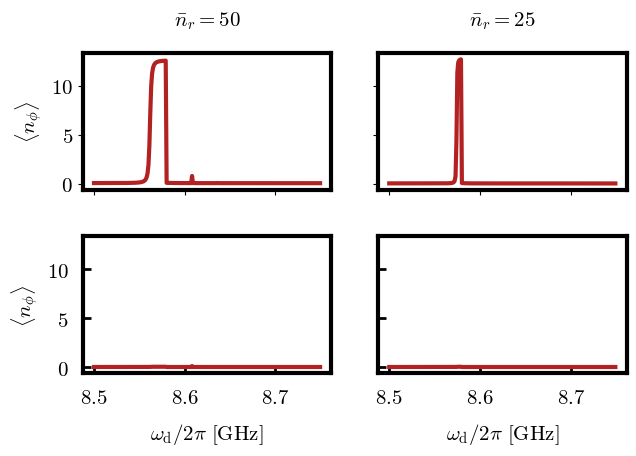

In [ ]:
#Figure 3
mpl.rcParams['mathtext.fontset']='cm'
nr=np.linspace(0,50,51)# We will be able to see enough transitions within these many readout photons
omega_d=np.linspace(8.5,9.5,1000)
fig,ax=plt.subplots(2,2,figsize=(7,5.2), sharey=True, sharex=True)
c=['Reds','Greens','Blues','Purples']
import matplotlib.ticker as mticker
ax[0,0].plot(omega_d[:250],flux_files[0,:250,50],color="firebrick",linewidth=3)
ax[1,0].plot(omega_d[:250],par_files[0,:250,50],color="firebrick",linewidth=3)

ax[0,1].plot(omega_d[:250],flux_files[0,:250,25],color="firebrick",linewidth=3)
ax[1,1].plot(omega_d[:250],par_files[0,:250,25],color="firebrick",linewidth=3)
for i in [0,1]:
    ax[i,0].set_yticks(np.linspace(0,10,3),[r"$0$",r"$5$",r"$10$"],fontsize=15)
    ax[1,i].tick_params(axis="y", direction='in', length=6, width=2,pad=10)
    ax[i,0].set_ylabel(r"$\langle n_\phi\rangle$",fontsize=15)
for i in [0,1]:
    ax[1,i].set_xticks(np.linspace(8.5,8.7,3),[r"$8.5$",r"$8.6$",r"$8.7$"],fontsize=15)
    ax[1,i].set_xlabel(r"$\omega_\mathrm{d}/2\pi \ \mathrm{[GHz]}$",fontsize=15,labelpad=10)
    ax[1,i].tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for i in [0,1]:
    for j in [0,1]:
        for axis in ['top','bottom','left','right'] :
            ax[i,j].spines[axis].set_linewidth(3)
            ax[i,j].spines[axis].set_linewidth(3)
ax[0,0].set_title(r"$\bar n_r=50$",fontsize=15,pad=20)
ax[0,1].set_title(r"$\bar n_r=25$",fontsize=15,pad=20)

fig.tight_layout(pad=3)    
plt.savefig("Paper_Figures/Stark_2D.pdf",bbox_inches='tight',dpi=300)

plt.show()

In [68]:
#Dephasing
X=np.geomspace(0.0000001,2,100)
Y=np.geomspace(1000,1000000,100)
Z=np.load("dephasing_th.npy")

fig, ax2 = plt.subplots(layout='constrained')
plt.rc('font', family='Roboto Regular')
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone)
#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='b')

#ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel(r'Initial Occupation $\langle n_\mu\rangle$',font=font,fontsize=15,labelpad=10)
ax2.set_ylabel('Internal Quality Factor ($Q_\mu$)',font=font,fontsize=15,labelpad=10)
ax2.set_yscale('log')
#ax2.set_xscale('log')
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel(r'Dephasing-induced state infidelity',font=font,x=1.0,fontsize=14,labelpad=10)
cbar.ax.set_yticks([0.0,0.1,0.2,0.3],[r"$0.0$",r"$0.1$",r"$0.2$",r"$0.3$"],font=font,fontsize=20)
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)
ax2.set_yticks([1000,10000,100000,1000000],[r"$10^3$",r"$10^4$",r"$10^5$",r"$10^6$"],font=font,fontsize=20)
ax2.tick_params(axis="y", direction='out', length=6, width=2, which='major',pad=10)
ax2.set_xticks([0.0,0.5,1,1.5,2.0],[r"$0.0$",r"$0.5$",r"$1.0$",r"$1.5$",r"$2.0$"],font=font,fontsize=20)
ax2.tick_params(axis="x", direction='out', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax2.spines[axis].set_linewidth(3)
    
#ax2.tight_layout(pad=5) 

plt.savefig("Paper_Figures/dephasing.pdf", dpi=300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dephasing_th.npy'

FileNotFoundError: [Errno 2] No such file or directory: 'Trans_0.npz'

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


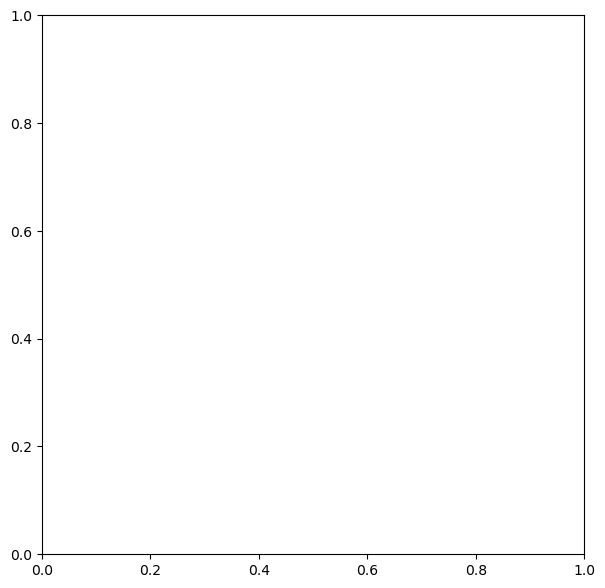

In [69]:
#Energy Profile
from cycler import cycler
def Transition(Arr):
    x1=np.array(Arr)[:,0]
    y1=[]
    z1=[]
    z1_=[]
    for i in range(len(Arr)):
        y1.append(np.array(Arr)[i,1][:,2])
        z=[]
        for j in range(len(y1[-1])):
            if np.array(Arr)[i,1][j,0]!=0 and np.array(Arr)[i,1][j,1]==0:
                z.append(str(int(np.array(Arr)[i,1][j,0]))+"r")
            elif np.array(Arr)[i,1][j,0]==0 and np.array(Arr)[i,1][j,1]!=0:
                z.append(str(int(np.array(Arr)[i,1][j,1]))+"p")
            else:
                z.append(str(int(np.array(Arr)[i,1][j,0]))+"r-"+str(int(np.array(Arr)[i,1][j,1]))+"p")    
        z1.append(z)
    return x1,y1,z1
def plot(x1,y1,z1,ax,ls,c,l):
    j=0
    #plt.subplot(2,2,ax)
    for xe, ye,ze in zip(x1, y1,z1):
        if j==0:
            plt.scatter([xe] * len(ye),ye,s=90,marker=ls,color=c,alpha=0.1,label=r"|"+l+r"$,0\rangle \rightarrow |f,n_\mu\rangle$")
        else:
            plt.scatter([xe] * len(ye),ye,s=90,marker=ls,color=c,alpha=0.1,label=None)
        j=j+1
        x2=[xe] * len(ye)
        #for i, txt in enumerate(ze):
         #   plt.annotate(txt,(x2[i], ye[i]),fontsize=12)
        plt.xlim(8.45,9.55)
        plt.ylim(-1,10)
        plt.xticks(np.arange(8.5,9.5,0.1),fontsize=12)
        plt.yticks(np.arange(0, 20, 1), fontsize=12)
        #plt.legend(loc='upper left',fontsize=12,facecolor="lightgrey")
        if np.mod(ax,2)!=0:
            plt.ylabel(r"Final Fluxonium Level: $|f\rangle$", fontsize=18,labelpad=10)
        if ax>2:
            plt.xlabel(r'Drive Frequency $(\omega_\mathrm{d}=\omega_\mathrm{r})$', fontsize=18,labelpad=10)
    
wr1=np.linspace(1.0,12.0,70)
    
fig,ax=plt.subplots(1,1,figsize=(7,7))
plt.rc('font', family='Roboto Regular')
#ax.plot(np.linspace(8.5,9.5,10),[2]*10,color="royalblue", linewidth=3, zorder=-1)
#ax.plot(np.linspace(8.5,9.5,10),[1]*10,color="forestgreen", linewidth=3, zorder=-1)
#ax.plot(np.linspace(8.5,9.5,10),[0]*10,color="firebrick", linewidth=3, zorder=-1)
a,b,c=Transition(np.load("Trans_0.npz",allow_pickle=True)['arr_0'])
plt.grid(linestyle="--")
plot(a,b,c,1,'D',"firebrick",'0')
a,b,c=Transition(np.load("Trans_1.npz",allow_pickle=True)['arr_0'])
plot(a,b,c,2,"s","forestgreen",'1')
a,b,c=Transition(np.load("Trans_2.npz",allow_pickle=True)['arr_0'])
plot(a,b,c,3,'o',"royalblue",'2')
#a,b,c=Transition(Trans3)
#plot(a,b,c,4,'o',"mediumorchid",'3')
plt.grid(False)
plt.yticks([0,1,2,5,10,15,20,],[r"$0$",r"$1$",r"$2$",r"$5$",r"$10$",r"$15$",r"$20$"],fontsize=20)
plt.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=20)
plt.xticks(np.linspace(8.5,9.5,5),[r"$8.50$",r"$8.75$",r"$9.00$",r"$9.25$",r"$9.50$"],fontsize=20)
plt.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right']:
    plt.gca().spines[axis].set_linewidth(3)

fig.tight_layout(pad=2) 
plt.grid(axis='y')
plt.savefig('trans_1.pdf', transparent=True,dpi=300)
plt.show()


In [70]:
par_files=np.load('par_low.npz')['arr_0']
flux_files=np.load('flux_low.npz')['arr_0']
cross_files=np.load('cross_low.npz')['arr_0']

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


15.755195207846052
1.967763389749165
13.822688965863332
1.8910501000927606
16.757477917061237
1.1656840797349939


findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


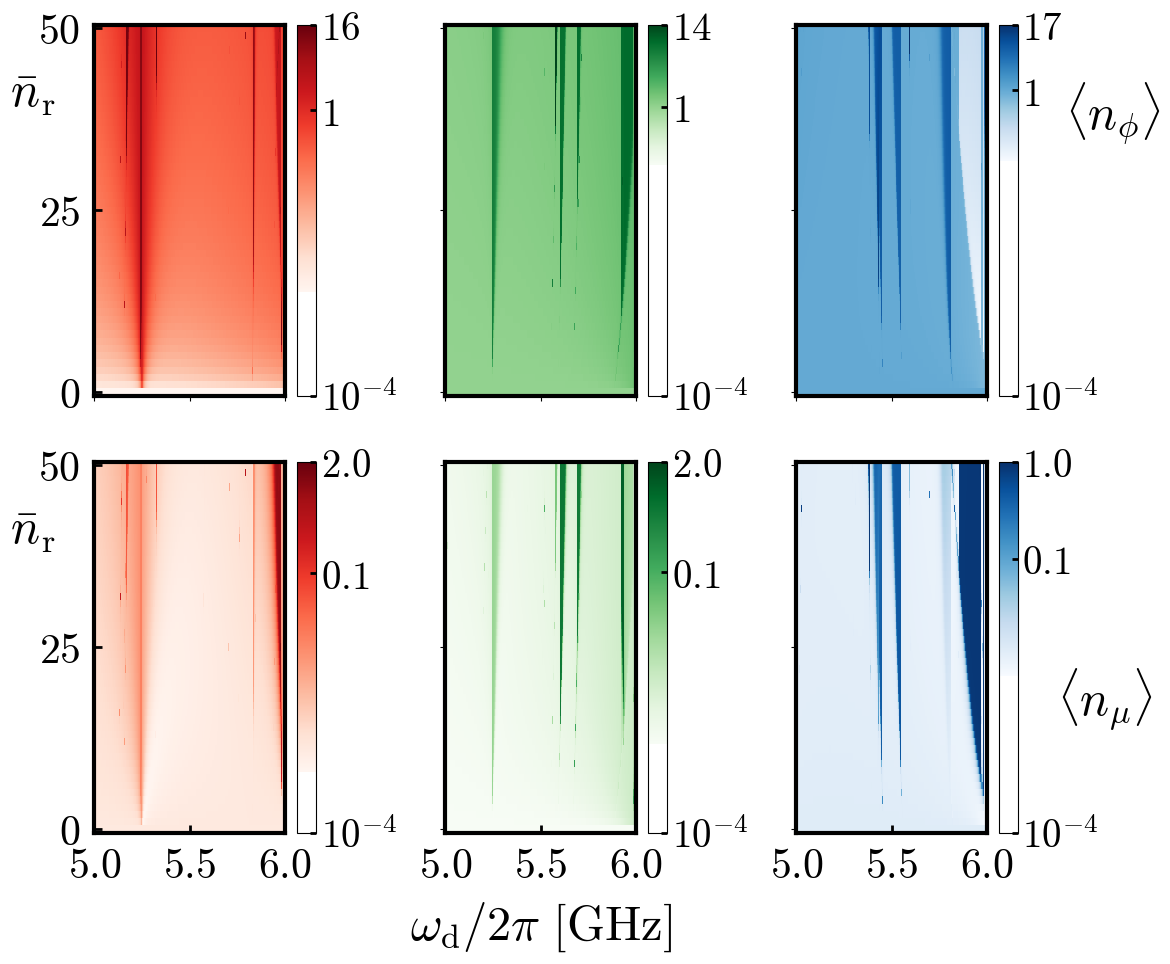

In [71]:
#Figure 3

nr=np.linspace(0,50,51)# We will be able to see enough transitions within these many readout photons
omega_d=np.linspace(5,6,1000)
fig,ax=plt.subplots(2,3,figsize=(12,10), sharey=True, sharex=True)
plt.rc('font', family='Roboto Regular')
c=['Reds','Greens','Blues','Purples']
import matplotlib.ticker as mticker
for i in range(3):#plot the first four states
    a=ax[0,i].pcolormesh(omega_d,nr,np.log(np.transpose(flux_files[i,:,:])),cmap=c[i])
    cbar = fig.colorbar(a,ax=ax[0,i])
    if i==2:
        cbar.ax.set_ylabel(r"$\langle n_\phi\rangle$",fontsize=35,rotation=360,y=0.85,labelpad=10)
    cbar.ax.yaxis.set_major_formatter('{x:0<5.1f}')
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    #cmin=np.min(np.transpose(flux_ex[:,i,:]))
    cmax=np.max(np.transpose(flux_files[i,:,:]))
    cmin=10**(-4)
    cmid=1
    print(cmax)
    #cmid=(cmin+cmax)/2
    if i==0:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmin+1),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$16$"],fontsize=28)
    if i==1:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmin+1),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$14$"],fontsize=28)
    if i==2:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmin+2),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$17$"],fontsize=28)    
    for axis in ['top','bottom','left','right']:
        cbar.ax.spines[axis].set_linewidth(3)
        cbar.ax.spines[axis].set_linewidth(3)
    b=ax[1,i].pcolormesh(omega_d,nr,np.log(np.transpose(par_files[i,:,:])),cmap=c[i])
    cbar=plt.colorbar(b, ax=ax[1, i])
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    if i==2:
        cbar.ax.set_ylabel(r"$\langle n_\mu\rangle$",fontsize=35,rotation=360,y=0.45)
    #cmin=np.min(np.transpose(par_ex[:,i,:]))
    cmin=10**(-4)
    cmax=np.max(np.transpose(par_files[i,:,:]))
    cmid=0.1
    print(cmax)
    if i==2:
        cbar.ax.set_yticks([np.log(cmin),np.log(0.1),np.log(cmax)],[r"$10^{-4}$",r"$0.1$",r"$1.0$"],fontsize=28)
    else:
        cbar.ax.set_yticks([np.log(cmin),np.log(0.1),np.log(cmax)],[r"$10^{-4}$",r"$0.1$",r"$2.0$"],fontsize=28)
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    for axis in ['top','bottom','left','right']:
        cbar.ax.spines[axis].set_linewidth(3)
        cbar.ax.spines[axis].set_linewidth(3)

    
for i in [0,1]:
    ax[i,0].set_yticks(np.linspace(0,50,3),[r"$0$",r"$25$",r"$50$"],fontsize=30)
    ax[i,0].set_ylabel(r"$\bar n_\mathrm{r}$",fontsize=35,rotation=360,y=0.75)
    ax[i,0].tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
for i in [0,1,2]:
    ax[1,i].set_xticks(np.linspace(5,6,3),[r"$5.0$",r"$5.5$",r"$6.0$"],fontsize=30)
    if i==1:
        ax[1,i].set_xlabel(r"$\omega_\mathrm{d}/2\pi \ \mathrm{[GHz]}$",fontsize=35,labelpad=10)
    ax[1,i].tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for i in [0,1]:
    for j in [0,1,2]:
        for axis in ['top','bottom','left','right'] :
            ax[i,j].spines[axis].set_linewidth(3)
            ax[i,j].spines[axis].set_linewidth(3)

fig.tight_layout(pad=2)    
plt.savefig("Paper_Figures/Floquet_low.pdf",bbox_inches='tight',dpi=300)

plt.show()

In [72]:
par_files=np.load('par_Will.npz')['arr_0']
flux_files=np.load('flux_Will.npz')['arr_0']
cross_files=np.load('cross_Will.npz')['arr_0']

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


8.733910739882454
1.0151636190231335
9.905330986774848
0.016412513671312693


findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


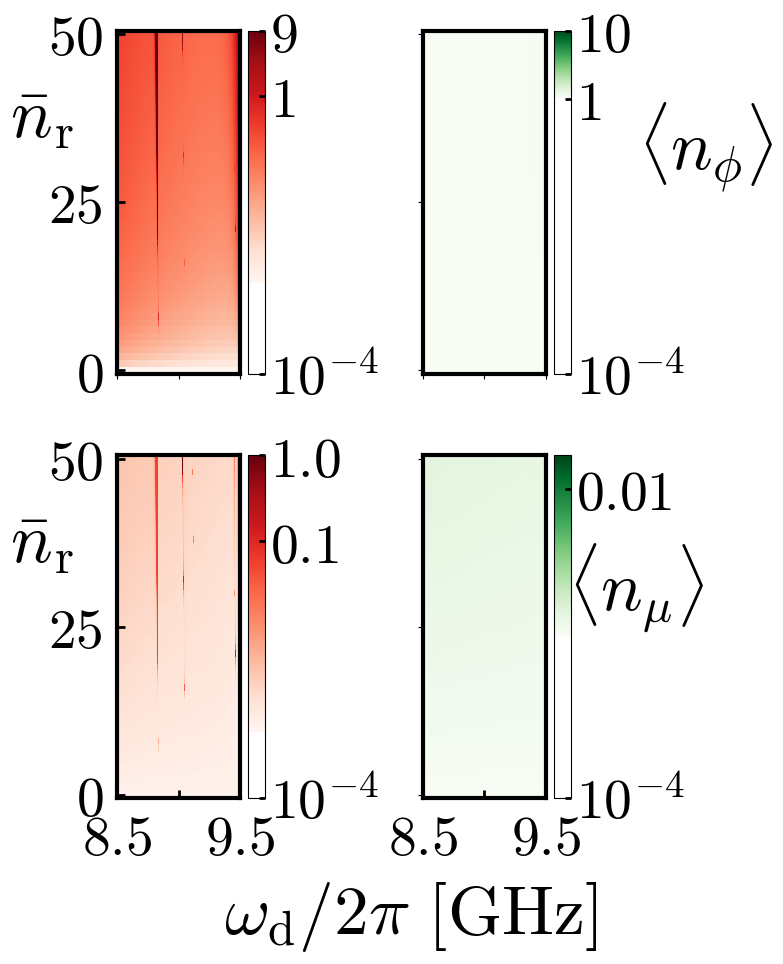

In [73]:
#Figure 3

nr=np.linspace(0,50,51)# We will be able to see enough transitions within these many readout photons
omega_d=np.linspace(8.5,9.5,1000)
fig,ax=plt.subplots(2,2,figsize=(8,10), sharey=True, sharex=True)
plt.rc('font', family='Roboto Regular')
c=['Reds','Greens','Blues','Purples']
import matplotlib.ticker as mticker
for i in range(2):#plot the first four states
    a=ax[0,i].pcolormesh(omega_d,nr,np.log(np.transpose(flux_files[i,:,:])),cmap=c[i])
    cbar = fig.colorbar(a,ax=ax[0,i])
    if i==1:
        cbar.ax.set_ylabel(r"$\langle n_\phi\rangle$",fontsize=50,rotation=360,y=0.8,labelpad=15)
    cbar.ax.yaxis.set_major_formatter('{x:0<5.1f}')
    #cmin=np.min(np.transpose(flux_ex[:,i,:]))
    cmax=np.max(np.transpose(flux_files[i,:,:]))
    cmin=10**(-4)
    cmid=1
    print(cmax)
    #cmid=(cmin+cmax)/2
    if i==0:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmin+1),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$9$"],fontsize=40)
    else:
        cbar.ax.set_yticks([np.log(cmin),np.log(cmin+1),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$10$"],fontsize=40)
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    for axis in ['top','bottom','left','right']:
        cbar.ax.spines[axis].set_linewidth(3)
        cbar.ax.spines[axis].set_linewidth(3)
    
    cmin=10**(-4)
    #cmin=np.min(np.transpose(par_ex[:,i,:]))
    cmax=np.max(np.transpose(par_files[i,:,:]))
    cmid=0.1
    print(cmax)
    b=ax[1,i].pcolormesh(omega_d,nr,np.log(np.transpose(par_files[i,:,:])),cmap=c[i])
    
    cbar=plt.colorbar(b, ax=ax[1, i])
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    if i==1:
        cbar.ax.set_ylabel(r"$\langle n_\mu\rangle$",fontsize=50,rotation=360,y=0.75,labelpad=-35)
    if i==0:
        cbar.ax.set_yticks([np.log(cmin),np.log(0.1),np.log(cmax)],[r"$10^{-4}$",r"$0.1$",r"$1.0$"],fontsize=40)    
    else:
        cbar.ax.set_yticks([np.log(cmin),np.log(0.01)],[r"$10^{-4}$",r"$0.01$"],fontsize=40)    
    for axis in ['top','bottom','left','right']:
        cbar.ax.spines[axis].set_linewidth(3)
        cbar.ax.spines[axis].set_linewidth(3)

    
for i in [0,1]:
    ax[i,0].set_yticks(np.linspace(0,50,3),[r"$0$",r"$25$",r"$50$"],fontsize=40)
    ax[i,0].set_ylabel(r"$\bar n_\mathrm{r}$",fontsize=50,rotation=360,y=0.65)
    ax[i,0].tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
for i in [0,1]:
    ax[1,i].set_xticks(np.linspace(8.5,9.5,3),[r"$8.5$","",r"$9.5$"],fontsize=40)
    if i==1:
        ax[1,i].set_xlabel(r"$\omega_\mathrm{d}/2\pi \ \mathrm{[GHz]}$",fontsize=50,x=-0.1,labelpad=10)
    ax[1,i].tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for i in [0,1]:
    for j in [0,1]:
        for axis in ['top','bottom','left','right'] :
            ax[i,j].spines[axis].set_linewidth(3)
            ax[i,j].spines[axis].set_linewidth(3)

fig.tight_layout(pad=2)    
plt.savefig("Paper_Figures/Floquet_Will.pdf",bbox_inches='tight',dpi=300)

plt.show()

In [74]:
textfile01='par_new_1.npz'
textfile02='flux_new_1.npz'
textfile03='cross_new_1.npz'
textfile11='par_gpq.npz'
textfile12='flux_gpq.npz'
textfile13='cross_gpq.npz'
textfile21='par_gp.npz'
textfile22='flux_gp.npz'
textfile23='cross_gp.npz'
par_files=np.array([np.load(textfile01)['arr_0'],np.load(textfile11)['arr_0'],np.load(textfile21)['arr_0']])
flux_files=np.array([np.load(textfile02)['arr_0'],np.load(textfile12)['arr_0'],np.load(textfile22)['arr_0']])
cross_files=np.array([np.load(textfile03)['arr_0'],np.load(textfile13)['arr_0'],np.load(textfile23)['arr_0']])

/var/folders/k1/xhhmv5bx629_dx3jv43kpn_80000gr/T/ipykernel_20194/31174327.py:12: RuntimeWarning: divide by zero encountered in log
  b=ax[1,i].pcolormesh(omega_d,nr,np.log(np.transpose(par_files[i,:,:])),vmin=np.log(np.min(np.transpose(par_files[i,:,:]))),vmax=np.log(np.max(np.transpose(par_files[i,:,:]))),cmap='Greens')
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
/opt/anaconda3/envs/qutip-env/lib/python3.10/site-packages/matplotlib/colors.py:1404: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/opt/anaconda3/envs/qutip-env/lib/python3.10/site-packages/matplotlib/colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
findfont: Font family 'Roboto Regular' not found.


1.9318146681476753


findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
/opt/anaconda3/envs/qutip-env/lib/python3.10/site-packages/matplotlib/colors.py:1404: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/opt/anaconda3/envs/qutip-env/lib/python3.10/site-packages/matplotlib/colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


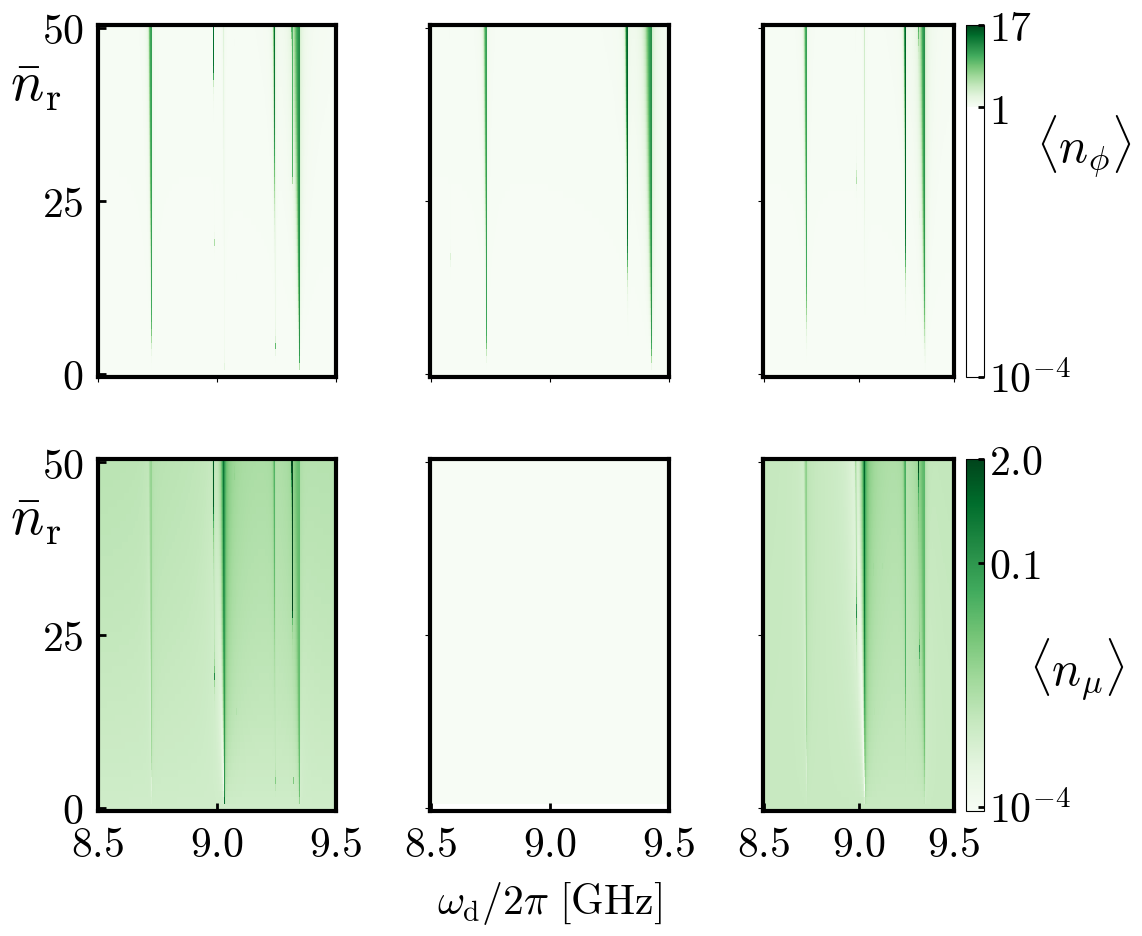

In [75]:
#Figure 3

nr=np.linspace(0,50,51)# We will be able to see enough transitions within these many readout photons
omega_d=np.linspace(8.5,9.5,1000)
fig,ax=plt.subplots(2,3,figsize=(12,10), sharey=True, sharex=True)
#plt.rc('font', family='Roboto Regular')
c=['Reds','Greens','Blues','Purples']
import matplotlib.ticker as mticker

for i in range(2):
    a=ax[0,i].pcolormesh(omega_d,nr,np.log(np.transpose(flux_files[i,:,:])),vmin=np.log(np.min(np.transpose(flux_files[i,:,:]))),vmax=np.log(np.max(np.transpose(flux_files[i,:,:]))),cmap='Greens')
    b=ax[1,i].pcolormesh(omega_d,nr,np.log(np.transpose(par_files[i,:,:])),vmin=np.log(np.min(np.transpose(par_files[i,:,:]))),vmax=np.log(np.max(np.transpose(par_files[i,:,:]))),cmap='Greens')
e=ax[0,2].pcolormesh(omega_d,nr,np.log(np.transpose(flux_files[2,:,:])),vmin=np.log(np.min(np.transpose(flux_files[2,:,:]))),vmax=np.log(np.max(np.transpose(flux_files[2,:,:]))),cmap='Greens')
cbar = fig.colorbar(e,ax=ax[0,2])
cbar.ax.set_ylabel(r"$\langle n_\phi\rangle$",fontsize=35,rotation=360,y=0.75,labelpad=10)
cbar.ax.yaxis.set_major_formatter('{x:0<5.1f}')
cbar.ax.tick_params( length=4,width=2,direction = 'in')
#cmin=np.min(np.transpose(flux_ex2[:,i,:]))
cmax=np.max(np.transpose(flux_files[2,:,:]))
cmin=10**(-4)
cmid=1
#cmid=np.min(np.transpose(flux_ex2[i,:,:]))+1
cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$1$",r"$17$"],fontsize=30)
for axis in ['top','bottom','left','right']:
    cbar.ax.spines[axis].set_linewidth(3)
    cbar.ax.spines[axis].set_linewidth(3)

f=ax[1,2].pcolormesh(omega_d,nr,np.log(np.transpose(par_files[2,:,:])),vmin=np.log(np.min(np.transpose(par_files[2,:,:]))),vmax=np.log(np.max(np.transpose(par_files[2,:,:]))),cmap='Greens')
cbar = fig.colorbar(f,ax=ax[1,2])
cbar.ax.set_ylabel(r"$\langle n_\mu\rangle$",fontsize=35,rotation=360,y=0.5,labelpad=5)
cbar.ax.yaxis.set_major_formatter('{x:0<5.1f}')
cbar.ax.tick_params( length=4,width=2,direction = 'in')
cmin=10**(-4)
cmax=np.max(np.transpose(par_files[2,:,:]))
cmid=0.1
print(cmax)
cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$0.1$",r"$2.0$"],fontsize=30)
for axis in ['top','bottom','left','right']:
    cbar.ax.spines[axis].set_linewidth(3)
    cbar.ax.spines[axis].set_linewidth(3)


for i in [0,1]:
    ax[i,0].set_yticks(np.linspace(0,50,3),[r"$0$",r"$25$",r"$50$"],fontsize=30)
    ax[i,0].tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
    ax[i,0].set_ylabel(r"$\bar n_\mathrm{r}$",fontsize=40,rotation=360,y=0.75)
for i in [0,1,2]:
    ax[1,i].set_xticks(np.linspace(8.5,9.5,3),[r"$8.5$",r"$9.0$",r"$9.5$"],fontsize=30)
    ax[1,i].tick_params(axis="x", direction='in', length=6, width=2,pad=10)
    if i==1:
        ax[1,i].set_xlabel(r"$\omega_\mathrm{d}/2\pi \ \mathrm{[GHz]}$",fontsize=30,labelpad=10)
for i in [0,1]:
    for j in [0,1,2]:
        for axis in ['top','bottom','left','right'] :
            ax[i,j].spines[axis].set_linewidth(3)
            ax[i,j].spines[axis].set_linewidth(3)

fig.tight_layout(pad=3)    
plt.savefig("Paper_Figures/Floquet_coupling.pdf",bbox_inches='tight',dpi=300)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Transitions/Trans_10.npy'

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


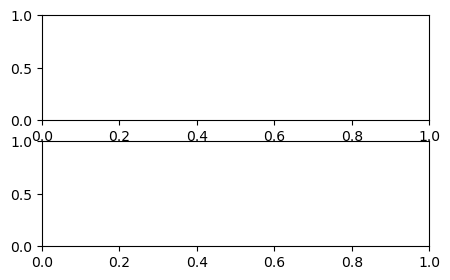

In [76]:
num_trans="Trans_10"
#trans="Transitions/Trans_"+str(num_trans)
trans="Transitions/"+str(num_trans)
en="Transitions/En_"+str(num_trans)+".pdf"
fig,ax=plt.subplots(2,1,figsize=(5,3))
plt.rc('font', family='Roboto Regular')
arr=np.load(trans+".npy",allow_pickle=True)
en_i=arr[0]
en_j=arr[1]
en_ex=arr[2]
pq_ex=arr[3]
pp_ex=arr[4]
x1=5
y1=25
ax[0].plot(nr[x1:y1],pq_ex[0][x1:y1],'-o',linewidth=2,color="forestgreen")
ax[0].plot(nr[x1:y1],pq_ex[1][x1:y1],'-o',linewidth=2,color="black")

ax[0].set_xticks(nr[x1:y1][::5],[])

ax[1].plot(nr[x1:y1],pp_ex[0][x1:y1],'-o',linewidth=2,color="forestgreen")
ax[1].plot(nr[x1:y1],pp_ex[1][x1:y1],'-o',linewidth=2,color="black")

ax[0].set_yticks([1,2],[r"$1$",r"$2$"],fontsize=20)
ax[1].set_yticks([0,1],[r"$0$",r"$1$"],fontsize=20)
for i in range(2):
    ax[i].tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax[0].set_ylabel(r"$\langle n_\phi\rangle$",rotation=0,y=0.3, fontsize=20)
ax[1].set_ylabel(r"$\langle n_\mu\rangle$", rotation=0,y=0.3,fontsize=20)
ax[0].set_ylim(0.9,2.1)
ax[1].set_ylim(-0.1,1.1)
ax[1].set_xlabel(r"$\bar n_r$", fontsize=20)

ax[1].set_xticks(np.linspace(x1,y1-1,5),[r"$5$",r"$10$",r"$15$",r"$20$",r"$25$"],fontsize=20)
ax[i].tick_params(axis="x", direction='in', length=6, width=2, which='major',pad=10)
for i in [0,1]:
    for axis in ['top','bottom','left','right'] :
        ax[i].spines[axis].set_linewidth(3)
        ax[i].spines[axis].set_linewidth(3)
fig.tight_layout(pad=1)
#plt.savefig(trans+".pdf",dpi=300)
plt.show()

NameError: name 'en_ex' is not defined

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


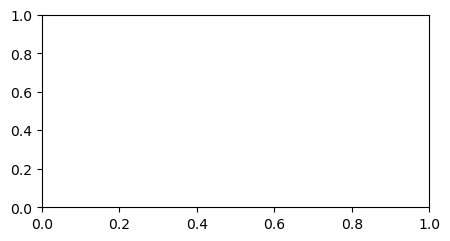

In [ ]:

fig,ax=plt.subplots(1,1,figsize=(5,2.5))
plt.rc('font', family='Roboto Regular')
x2=17
y2=22
#ax.plot(nr[x2:y2],en_i[x2:y2],'-.',linewidth=2,color="forestgreen")
ax.plot(nr[x2:y2],en_ex[0][x2:y2],'-o',linewidth=2,color="firebrick")
#ax.plot(nr[x2:y2],en_j[x2:y2],'-.',linewidth=2,color="black")
ax.plot(nr[x2:y2],en_ex[1][x2:y2],'-o',linewidth=2,color="black")
ax.set_yticks(np.linspace(4.526,4.527,2),[r"$6$",r"$7$"],fontsize=20)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks(np.linspace(x2,y2-1,5),[r"$22$",r"$23$",r"$24$",r"$25$",r"$26$"],fontsize=20)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
ax.set_ylabel(r"$E_i \ \mathrm{mod} \ \omega_d/2\pi$", fontsize=16)
ax.set_xlabel(r"$\bar n_r$", fontsize=30)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout()
#plt.savefig(en,dpi=300)
plt.show()

In [ ]:
#convergence
txtfile01='flux_converge_30_10_upto_929.npz'
txtfile02='flux_converge_30_10_929_to_950.npz'
txtfile11='par_converge_30_10_upto_929.npz'
txtfile12='par_converge_30_10_929_to_950.npz'
txtfile21='cross_converge_30_10_upto_929.npz'
txtfile22='cross_converge_30_10_929_to_950.npz'
load_original_flux = np.array(list(np.load(txtfile01)['arr_0'])[:790]+list(np.load(txtfile02)['arr_0'])[1:])
load_original_par = np.array(list(np.load(txtfile11)['arr_0'])[:790]+list(np.load(txtfile12)['arr_0'])[1:])
load_original_cross = np.array(list(np.load(txtfile21)['arr_0'])[:790]+list(np.load(txtfile22)['arr_0'])[1:])
print(load_original_flux.shape)
'''+np.load(txtfile02)['arr_0']
loaded_original_par = np.load(txtfile11)['arr_0']+np.load(txtfile12)['arr_0']
loaded_original_cross = np.load(txtfile21)['arr_0']+np.load(txtfile22)['arr_0']
'''


(1000, 3, 51)


"+np.load(txtfile02)['arr_0']\nloaded_original_par = np.load(txtfile11)['arr_0']+np.load(txtfile12)['arr_0']\nloaded_original_cross = np.load(txtfile21)['arr_0']+np.load(txtfile22)['arr_0']\n"

/var/folders/k1/xhhmv5bx629_dx3jv43kpn_80000gr/T/ipykernel_83230/4005371922.py:16: RuntimeWarning: divide by zero encountered in log
  a=ax[0,i].pcolormesh(omega_d,nr,np.log(np.transpose(flux_ex[:,i,:])),cmap=c[i])
/var/folders/k1/xhhmv5bx629_dx3jv43kpn_80000gr/T/ipykernel_83230/4005371922.py:32: RuntimeWarning: divide by zero encountered in log
  b=ax[1,i].pcolormesh(omega_d,nr,np.log(np.transpose(par_ex[:,i,:])),cmap=c[i])
/var/folders/k1/xhhmv5bx629_dx3jv43kpn_80000gr/T/ipykernel_83230/4005371922.py:16: RuntimeWarning: divide by zero encountered in log
  a=ax[0,i].pcolormesh(omega_d,nr,np.log(np.transpose(flux_ex[:,i,:])),cmap=c[i])
/var/folders/k1/xhhmv5bx629_dx3jv43kpn_80000gr/T/ipykernel_83230/4005371922.py:32: RuntimeWarning: divide by zero encountered in log
  b=ax[1,i].pcolormesh(omega_d,nr,np.log(np.transpose(par_ex[:,i,:])),cmap=c[i])
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not

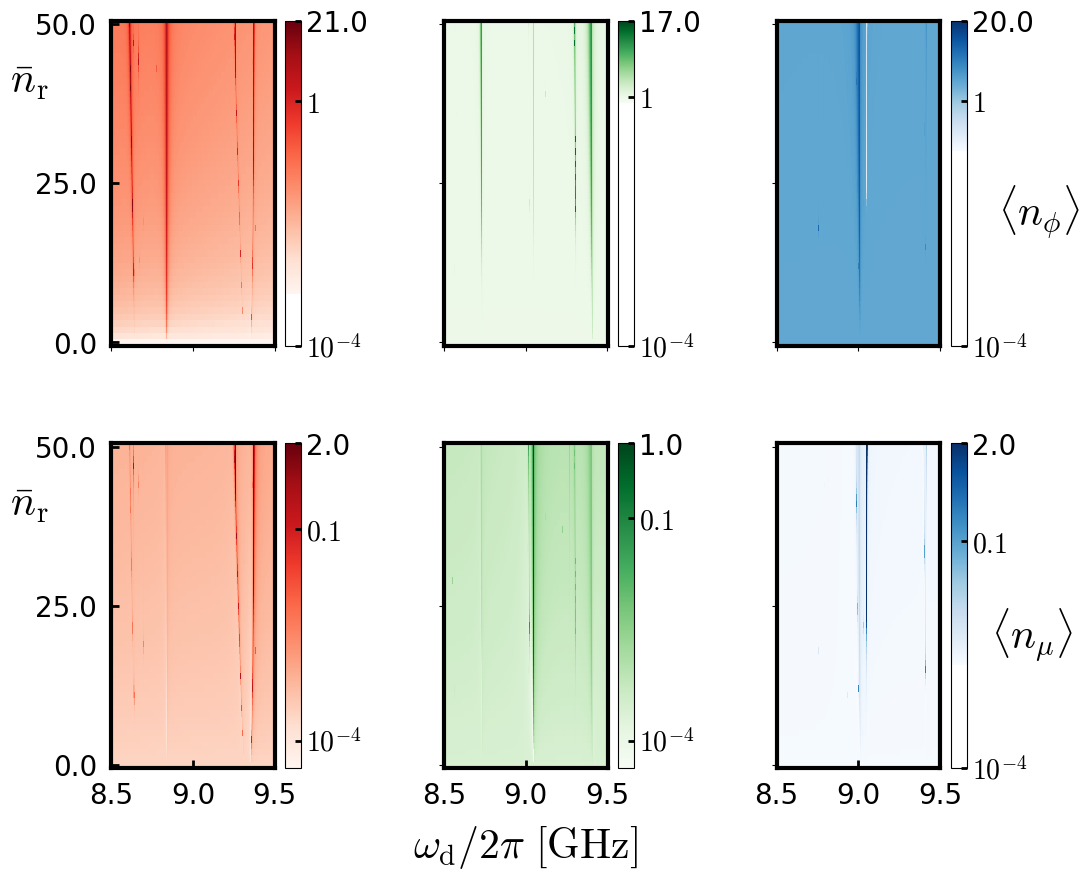

In [ ]:
#Figure 3
mpl.rcParams['mathtext.fontset']='cm'

nr=np.linspace(0,50,51)# We will be able to see enough transitions within these many readout photons
omega_d=np.linspace(8.5,9.5,1000)
fig,ax=plt.subplots(2,3,figsize=(12,10), sharey=True, sharex=True)
plt.rc('font', family='Roboto Regular')
flux_ex=np.array(load_original_flux)
par_ex=np.array(load_original_par)
cross_ex=np.array(load_original_cross)
c=['Reds','Greens','Blues','Purples']
plt.rc('font', family='Roboto Regular')
import matplotlib.ticker as mticker
for i in range(3):#plot the first four states
    
    a=ax[0,i].pcolormesh(omega_d,nr,np.log(np.transpose(flux_ex[:,i,:])),cmap=c[i])
    cbar = fig.colorbar(a,ax=ax[0,i])
    if i==2:
        cbar.ax.set_ylabel(r"$\langle n_\phi\rangle$",fontsize=30,rotation=360,y=0.5)
    cbar.ax.yaxis.set_major_formatter('{x:0<5.1f}')
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    #cmin=np.min(np.transpose(flux_ex[:,i,:]))
    cmin=10**(-4)
    cmid=1
    cmax=np.max(np.transpose(flux_ex[:,i,:]))
    #cmid=np.min(np.transpose(flux_ex[:,i,:]))+1
    cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$1$",str(np.rint(cmax))],fontsize=20)
    for axis in ['top','bottom','left','right']:
        cbar.ax.spines[axis].set_linewidth(3)
        cbar.ax.spines[axis].set_linewidth(3)
    
    b=ax[1,i].pcolormesh(omega_d,nr,np.log(np.transpose(par_ex[:,i,:])),cmap=c[i])
    cbar=plt.colorbar(b, ax=ax[1, i])
    if i==2:
        cbar.ax.set_ylabel(r"$\langle n_\mu\rangle$",fontsize=30,rotation=360)
    #cmin=np.min(np.transpose(par_ex[:,i,:]))
    cmax=np.max(np.transpose(par_ex[:,i,:]))
    cmin=10**(-4)
    cmid=0.1
    cbar.ax.set_yticks([np.log(cmin),np.log(cmid),np.log(cmax)],[r"$10^{-4}$",r"$0.1$",str(np.rint(cmax))],fontsize=20)
    cbar.ax.tick_params( length=4,width=2,direction = 'in')
    for axis in ['top','bottom','left','right']:
        cbar.ax.spines[axis].set_linewidth(3)
        cbar.ax.spines[axis].set_linewidth(3)

    
for i in [0,1]:
    ax[i,0].set_yticks(np.linspace(0,50,3),np.linspace(0,50,3),fontsize=20)
    ax[i,0].set_ylabel(r"$\bar n_\mathrm{r}$",fontsize=30,rotation=360,y=0.75)
    ax[i,0].tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
for i in [0,1,2]:
    ax[1,i].set_xticks(np.linspace(8.5,9.5,3),np.linspace(8.5,9.5,3),fontsize=20)
    if i==1:
        ax[1,i].set_xlabel(r"$\omega_\mathrm{d}/2\pi \ \mathrm{ [GHz]}$",fontsize=30,labelpad=10)
    ax[1,i].tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for i in [0,1]:
    for j in [0,1,2]:
        for axis in ['top','bottom','left','right'] :
            ax[i,j].spines[axis].set_linewidth(3)
            ax[i,j].spines[axis].set_linewidth(3)

fig.tight_layout(pad=5)    
plt.savefig("Floquet_convergence.pdf",dpi=300)

plt.show()

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


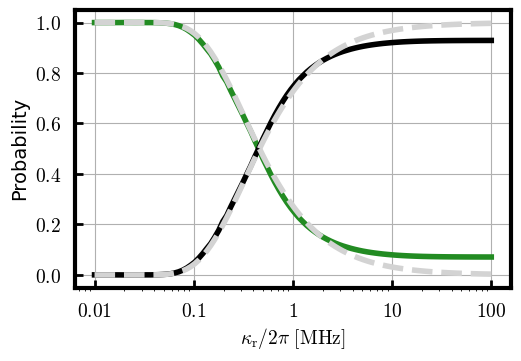

In [ ]:
index=""
LZ2=np.load("LZ1"+index+".npy")
over1_ex02=np.load("state_i"+index+".npy")
over1_ex12=np.load("state_f"+index+".npy")
fig,ax=plt.subplots(1,1)
plt.rc('font', family='Roboto Regular')
ax.plot(np.geomspace(0.00001,0.1,100)[:]*(10**3),np.array(over1_ex02)[:],'-',linewidth=4,color="forestgreen",label=r"$1-\langle i_{t_f}|U(t_f)|i\rangle$")# 3 to 4
ax.plot(np.geomspace(0.00001,0.1,100)[:]*(10**3),np.array(over1_ex12)[:],'-',linewidth=4,color="black",label=r"$\langle f_{t_f}|U(t_f)|i\rangle$")# 3 to 4
ax.plot(np.geomspace(0.00001,0.1,100)[:]*(10**3),1-np.array(LZ2)[:],'--',linewidth=4,color="lightgray",label=r"LZ: $1-e^{-\pi\Delta_{ac}^2/2v_{ac}}$")#0 to 11
ax.plot(np.geomspace(0.00001,0.1,100)[:]*(10**3),np.array(LZ2)[:],'--',linewidth=4,color="lightgray",label=r"LZ: $1-e^{-\pi\Delta_{ac}^2/2v_{ac}}$")#0 to 11
ax.set_xscale('log')
ax.set_xlabel(r"$\kappa_\mathrm{r}/2\pi \ \mathrm{[MHz]}$",fontsize=14)
ax.set_ylabel("Probability",fontsize=14)
ax.set_xticks(np.geomspace(0.00001,0.1,5)*(10**3),[r"$0.01$",r"$0.1$",r"$1$",r"$10$",r"$100$"],fontsize=14)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],[r"$0.0$",r"$0.2$",r"$0.4$",r"$0.6$",r"$0.8$",r"$1.0$"],fontsize=14)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout(pad=5) 
plt.grid()
plt.savefig("Trans_prob"+index+".pdf", bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
e_c=(sc.e)**2/2/sc.h/10**(-6)#e_c/C(fF)=f(in GHz). 1/10^(-6)=1/(fF*Giga)
tpi=1
N=122
EJ1=7.3*tpi# Phase-Slip junction energy. Modified from 7.3
EJJ=60*tpi#JJA junction energy
Ec=e_c/1*tpi#coupling capacitance energy
Eg=e_c/0.1*tpi#ground capacitance energy
ECJ=0.74*tpi#JJA capacitance energy
Eg1=e_c/10*tpi#ground capacitance for JJ
E_tot=e_c/19.4*tpi#target capacitance (We can achieve this using the differential capacitance upto EJ/Ec=20)
wr=8.5*tpi#readout frequency
EC1=((1/E_tot-1/2/Eg1)**(-1))# Phase-Slip capacitance energy. Modified to have target capacitance equal to 2GHz, 1.2 because the ground capacitance is in parallel.

print(4/(np.sqrt(2*N))*0.9177436958045079*)

0.9984654291061403
0.25607375986579195
